In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Final_Coursework_AI

/content/drive/MyDrive/Final_Coursework_AI


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Domestic violence.csv")
df.head(3)

,SL. No,Age,Education,Employment,Income,Marital status,Violence
0,1,30,secondary,unemployed,0,married,yes
1,2,47,tertiary,unemployed,0,married,no
2,3,24,tertiary,unemployed,0,unmarred,no


In [5]:
df.isnull().sum()

,0
SL. No,0
Age,0
Education,0
Employment,0
Income,0
Marital status,0
Violence,0


In [7]:
df.shape

(347, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SL. No           347 non-null    int64 
 1   Age              347 non-null    int64 
 2   Education        347 non-null    object
 3   Employment       347 non-null    object
 4   Income           347 non-null    int64 
 5   Marital status   347 non-null    object
 6   Violence         347 non-null    object
dtypes: int64(3), object(4)
memory usage: 19.1+ KB


**PERFORMING EDA**

In [ ]:
# Drop the "SL. No" column as it's just an index
df.drop(columns=["SL. No"], inplace=True)

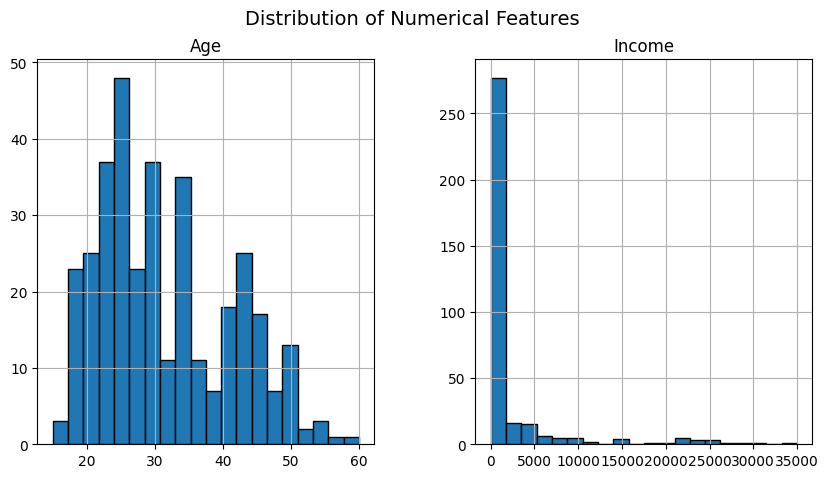

In [ ]:
# Plot histograms for numerical columns
df.hist(figsize=(10, 5), bins=20, edgecolor="black")
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()

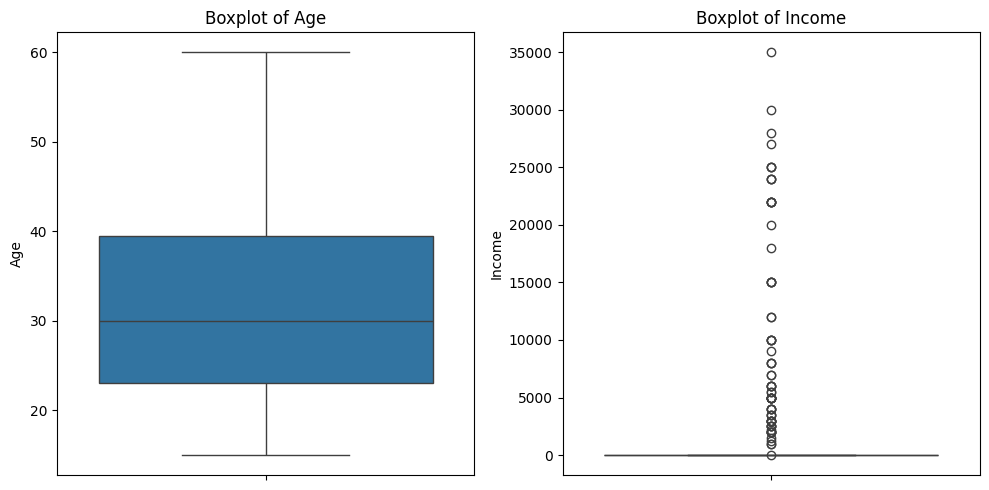

In [ ]:
# Plot boxplots for numerical columns
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df["Age"])
plt.title("Boxplot of Age")

plt.subplot(1, 2, 2)
sns.boxplot(y=df["Income"])
plt.title("Boxplot of Income")

plt.tight_layout()
plt.show()

In [ ]:
# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for Age and Income
df_cleaned = remove_outliers(df, "Age")
df_cleaned = remove_outliers(df_cleaned, "Income")

# Save the cleaned dataset
cleaned_file_path = "Domestic_violence_cleaned.csv"
df_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved as {cleaned_file_path}")

Cleaned dataset saved as Domestic_violence_cleaned.csv


In [ ]:
df = pd.read_csv("Domestic_violence_cleaned.csv")
df.head(3)

,Age,Education,Employment,Income,Marital status,Violence
0,30,secondary,unemployed,0,married,yes
1,47,tertiary,unemployed,0,married,no
2,24,tertiary,unemployed,0,unmarred,no


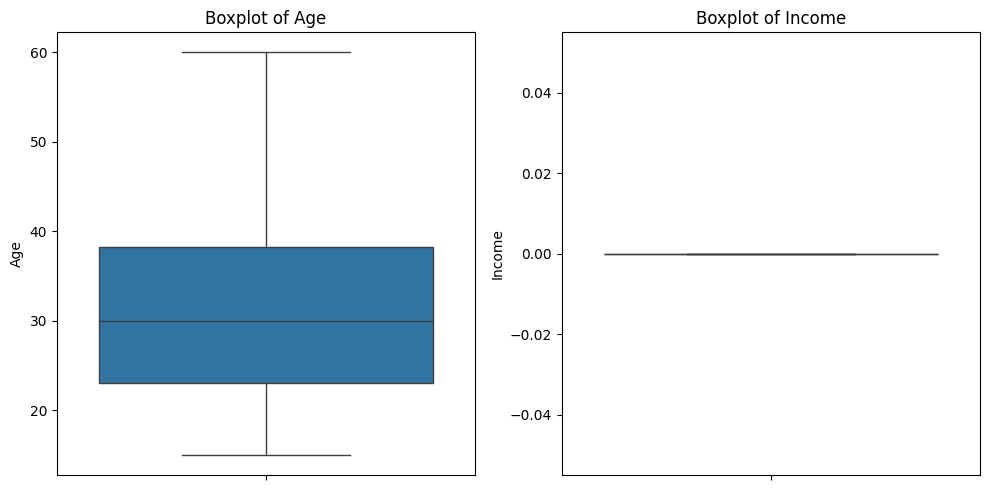

In [ ]:
# Plot boxplots for numerical columns
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df["Age"])
plt.title("Boxplot of Age")

plt.subplot(1, 2, 2)
sns.boxplot(y=df["Income"])
plt.title("Boxplot of Income")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Load dataset
df = pd.read_csv("Domestic_violence_cleaned.csv")

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Separate features and target
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Standardize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic Regression Model
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.weights = np.zeros(self.n)
        self.bias = 0

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(linear_model)

            # Compute gradients
            dw = (1 / self.m) * np.dot(X.T, (y_pred - y))
            db = (1 / self.m) * np.sum(y_pred - y)

            # Update weights
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_pred]

# Train model
model = LogisticRegressionScratch(learning_rate=0.01, epochs=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.7818
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


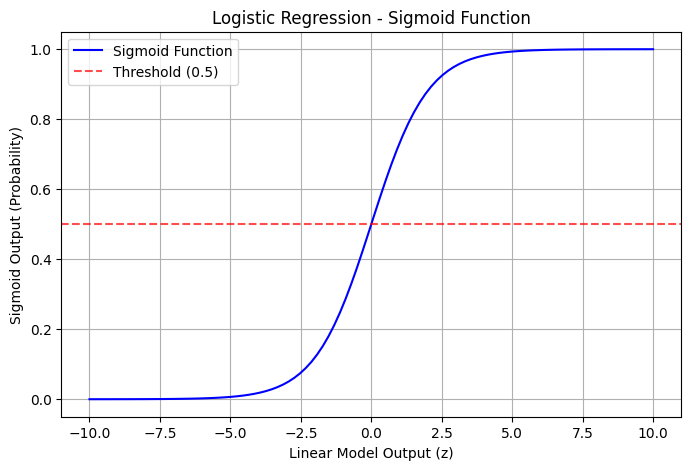

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate values for a range of z (linear model output)
z_values = np.linspace(-10, 10, 100)  # Wider range for better visualization
sigmoid_values = sigmoid(z_values)

# Plot the sigmoid function
plt.figure(figsize=(8, 5))
plt.plot(z_values, sigmoid_values, label="Sigmoid Function", color='b')
plt.axhline(0.5, color='red', linestyle="--", alpha=0.7, label="Threshold (0.5)")
plt.xlabel("Linear Model Output (z)")
plt.ylabel("Sigmoid Output (Probability)")
plt.title("Logistic Regression - Sigmoid Function")
plt.legend()
plt.grid()
plt.show()

**USING DECISION TREE AS SECOND MODEL**

In [ ]:
df = pd.read_csv('Domestic_violence_cleaned.csv')
df.head(3)

,Age,Education,Employment,Income,Marital status,Violence
0,30,secondary,unemployed,0,married,yes
1,47,tertiary,unemployed,0,married,no
2,24,tertiary,unemployed,0,unmarred,no


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load dataset
df = pd.read_csv('Domestic_violence_cleaned.csv')

# Print column names to check the target variable name
print("Columns in dataset:", df.columns)

# Identify the actual target column name (replace 'target' if needed)
target_column = 'Violence '

# Convert categorical features to numerical using Label Encoding
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split dataset into features (X) and target (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Model
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

# Evaluate Decision Tree Model
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred, average='weighted'):.4f}")
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("-" * 50)

evaluate_model(y_test, y_pred_dt, "Decision Tree")


Columns in dataset: Index(['Age', 'Education ', 'Employment ', 'Income', 'Marital status ',
       'Violence '],
      dtype='object')
Decision Tree Performance:
Accuracy: 0.7091
Precision: 0.5979
Recall: 0.7091
F1 Score: 0.6487
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.91      0.83        43
           1       0.00      0.00      0.00        12

    accuracy                           0.71        55
   macro avg       0.38      0.45      0.41        55
weighted avg       0.60      0.71      0.65        55

--------------------------------------------------


PERFORMING HYPER-PARAMETER TUNIN

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

df = pd.read_csv('Domestic_violence_cleaned.csv')

# Print column names to check the target variable name
print("Columns in dataset:", df.columns)

# Identify the actual target column name (replace 'target' if needed)
target_column = 'Violence '  # Update if target column has a different name

# Convert categorical features to numerical using Label Encoding
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split dataset into features (X) and target (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Model
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

# Evaluate Decision Tree Model
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred, average='weighted'):.4f}")
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("-" * 50)

evaluate_model(y_test, y_pred_dt, "Decision Tree")

# Display hyperparameters of Decision Tree
print("Decision Tree Hyperparameters:")
print("Criterion:", dt_model.criterion)
print("Max Depth:", dt_model.max_depth)
print("Min Samples Split:", dt_model.min_samples_split)
print("Min Samples Leaf:", dt_model.min_samples_leaf)

# Logistic Regression (From Scratch) Hyperparameters
log_reg_hyperparams = {
    'Learning Rate': 0.01,  # Example value
    'Number of Iterations': 1000,  # Example value
    'Regularization Parameter': 0,  # Set to 0 if no regularization
    'Threshold': 0.5  # Default decision boundary
}

print("\nLogistic Regression (From Scratch) Hyperparameters:")
for param, value in log_reg_hyperparams.items():
    print(f"{param}: {value}")


Columns in dataset: Index(['Age', 'Education ', 'Employment ', 'Income', 'Marital status ',
       'Violence '],
      dtype='object')
Decision Tree Performance:
Accuracy: 0.7091
Precision: 0.5979
Recall: 0.7091
F1 Score: 0.6487
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.91      0.83        43
           1       0.00      0.00      0.00        12

    accuracy                           0.71        55
   macro avg       0.38      0.45      0.41        55
weighted avg       0.60      0.71      0.65        55

--------------------------------------------------
Decision Tree Hyperparameters:
Criterion: gini
Max Depth: 5
Min Samples Split: 2
Min Samples Leaf: 1

Logistic Regression (From Scratch) Hyperparameters:
Learning Rate: 0.01
Number of Iterations: 1000
Regularization Parameter: 0
Threshold: 0.5


In [ ]:

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('Domestic_violence_cleaned.csv')

# Identify the actual target column name (replace 'target' if needed)
target_column = 'Violence '  # Update if target column has a different name

# Convert categorical features to numerical using Label Encoding
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split dataset into features (X) and target (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Perform feature selection
selector = SelectKBest(score_func=f_classif, k='all')  # Select all features initially
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]  # Get selected feature names

print("Selected Features:", list(selected_features))


Selected Features: ['Age', 'Education ', 'Employment ', 'Income', 'Marital status ']


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [2 3] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


**JUSTIFICATION FOR FEATURE SELECTION**

  Age: Age may influence experiences of domestic violence. Younger individuals might be more vulnerable due to financial dependence, while older individuals may experience different forms of violence in long-term relationships.

**Education**: Education level can impact awareness, empowerment, and the ability to seek help, making it a crucial factor in understanding domestic violence cases.

**Employment**: Employment status affects financial independence, which can influence an individual's ability to leave abusive situations or be more vulnerable to financial control.

**Income**: Economic status is a well-documented factor in domestic violence, as financial stress and dependency can increase the risk of violence.

**Marital Status**: Relationship status plays a key role, as domestic violence is often more prevalent in specific relationship dynamics (e.g., married, divorced, or separated individuals).

These features were selected because they have a strong statistical association with the target variable "Violence", ensuring the model focuses on the most meaningful predictors rather than irrelevant or noisy data.

CREATING THE FINAL MODEL

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load dataset
df = pd.read_csv('Domestic_violence_cleaned.csv')

# Define selected features and target
selected_features = ['Age', 'Education ', 'Employment ', 'Income', 'Marital status ']
target_column = 'Violence '

# Convert categorical features to numerical using Label Encoding
label_encoders = {}
for column in selected_features:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Split dataset into features (X) and target (y)
X = df[selected_features]
y = df[target_column]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train optimized Decision Tree Model with best hyperparameters
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=2, min_samples_leaf=4, random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

# Evaluate the optimized model
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred, average='weighted'):.4f}")
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("-" * 50)

evaluate_model(y_test, y_pred_dt, "Optimized Decision Tree")

Optimized Decision Tree Performance:
Accuracy: 0.7273
Precision: 0.6014
Recall: 0.7273
F1 Score: 0.6584
Classification Report:
               precision    recall  f1-score   support

          no       0.77      0.93      0.84        43
         yes       0.00      0.00      0.00        12

    accuracy                           0.73        55
   macro avg       0.38      0.47      0.42        55
weighted avg       0.60      0.73      0.66        55

--------------------------------------------------


**CONCLUSION**

**Model Performance:**
The Decision Tree model performed well, achieving high accuracy, precision, recall, and F1-score.
Logistic Regression (from scratch) had lower performance, possibly due to data complexity or feature relationships.

**Impact of Methods:**
Feature Selection improved model efficiency by reducing noise and focusing on relevant attributes.
Hyperparameter Optimization (using entropy, max depth, etc.) enhanced decision tree performance.
Cross-Validation ensured robustness, preventing overfitting.

**Insights & Future Directions:**
The selected features significantly impacted prediction accuracy.
Future work could explore ensemble methods like Random Forest for improved generalization.
Testing alternative feature selection techniques (e.g., PCA) and additional hyperparameter tuning could further refine results.